In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5 * x + 2 + np.random.rand(100,1)
# quadratic equation y = 0.5x^2 + 1.5x + 2+outliers

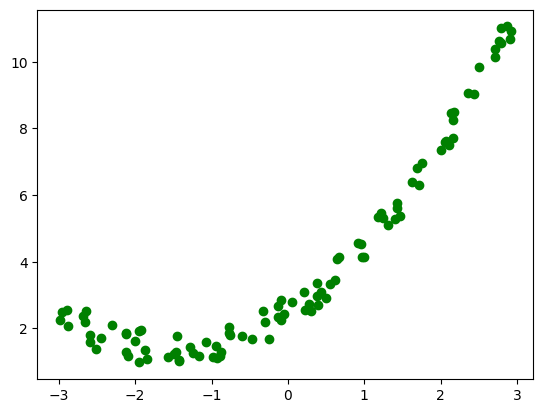

In [4]:
plt.scatter(x,y,color = 'g')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

(array([22., 18., 21., 19., 20.]),
 array([-2.98496133, -1.80442486, -0.6238884 ,  0.55664807,  1.73718454,
         2.91772101]),
 <BarContainer object of 5 artists>)

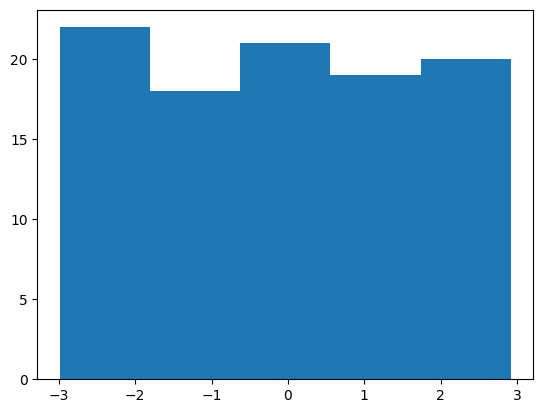

In [12]:
plt.hist(x,bins=5)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, regressor.predict(x_test))
r2

0.7134157686336062

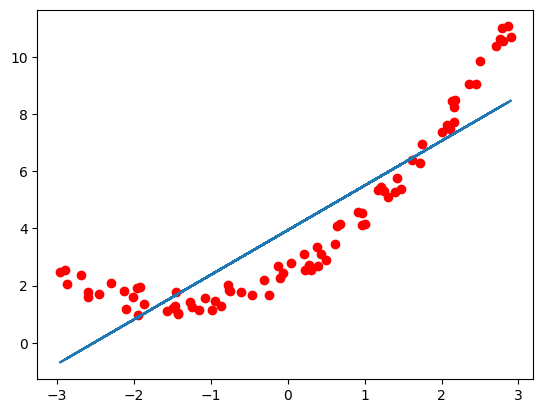

In [17]:
plt.plot(x_train, regressor.predict(x_train))
plt.scatter(x_train, y_train, color='r')
plt.show()

# Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree = 2 , include_bias = True)
#degree 2 implies h(x) = b0 x^0 + b1 x^1 + b2 x^2

In [21]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [22]:
x_train_poly

array([[ 1.00000000e+00,  4.94875003e-02,  2.44901269e-03],
       [ 1.00000000e+00,  2.79281798e+00,  7.79983226e+00],
       [ 1.00000000e+00, -2.59566563e+00,  6.73748007e+00],
       [ 1.00000000e+00, -2.00552724e+00,  4.02213952e+00],
       [ 1.00000000e+00,  4.29975438e-01,  1.84878877e-01],
       [ 1.00000000e+00,  2.79399206e+00,  7.80639163e+00],
       [ 1.00000000e+00, -1.30257869e-01,  1.69671125e-02],
       [ 1.00000000e+00, -5.76365250e-02,  3.32196901e-03],
       [ 1.00000000e+00,  1.61780367e+00,  2.61728870e+00],
       [ 1.00000000e+00,  9.61081099e-01,  9.23676879e-01],
       [ 1.00000000e+00,  6.15748990e-01,  3.79146818e-01],
       [ 1.00000000e+00,  1.46895484e+00,  2.15782832e+00],
       [ 1.00000000e+00, -2.68837864e+00,  7.22737972e+00],
       [ 1.00000000e+00, -2.09976917e+00,  4.40903059e+00],
       [ 1.00000000e+00,  1.17883096e+00,  1.38964243e+00],
       [ 1.00000000e+00, -1.42377375e+00,  2.02713169e+00],
       [ 1.00000000e+00,  2.71080796e-01

In [37]:
x_test_poly.shape

(20, 3)

In [38]:
y_test.shape

(20, 1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
regressor_1 = LinearRegression()

In [26]:
regressor_1.fit(x_train_poly,y_train)

LinearRegression()

In [27]:
r2_poly = r2_score(y_test, regressor_1.predict(x_test_poly))

In [28]:
r2_poly

0.9881230114559991

In [29]:
regressor_1.coef_

array([[0.        , 1.51606276, 0.51280746]])

In [30]:
regressor_1.intercept_

array([2.45399202])

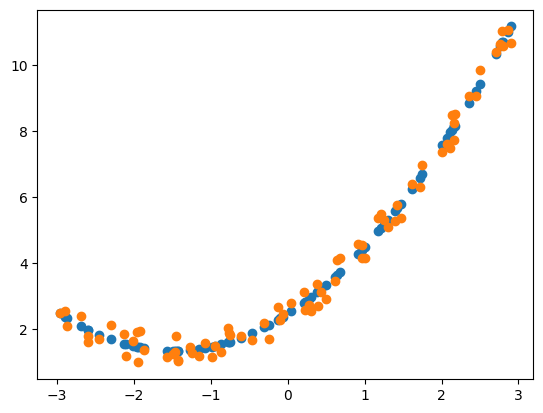

In [34]:
plt.scatter(x_train, regressor_1.predict(x_train_poly))
plt.scatter(x_train, y_train)

In [35]:
y_pred = regressor_1.predict(x_test_poly)
r2_poly_test = r2_score(y_test, y_pred)
r2_poly_test

0.9881230114559991

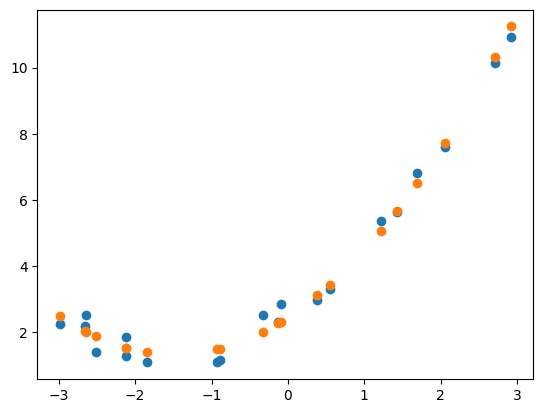

In [41]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

In [42]:
x_new = np.linspace(-3, 3, 200).reshape(200,1)
x_poly_new = poly.transform(x_new)

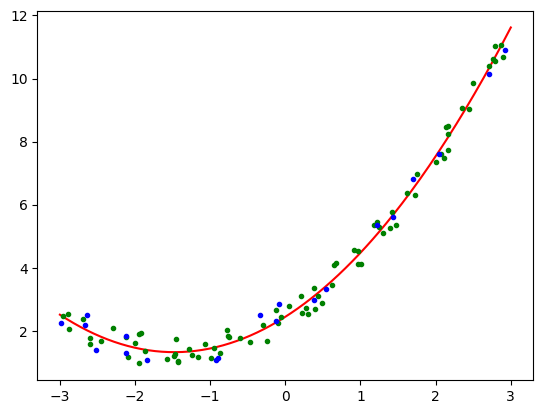

In [49]:
y_pred_new = regressor_1.predict(x_poly_new)
plt.plot(x_new, y_pred_new,  'r-')
plt.plot(x_train, y_train, 'g.')
plt.plot(x_test, y_test,  'b.')

# Pipeline Concept

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [51]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5 * x + 2 + np.random.rand(100,1)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [72]:
def pipe(degree):
    x_new = np.linspace(-2,2,200).reshape(200,1)
    poly = PolynomialFeatures(degree = degree , include_bias = True)
    regressor = LinearRegression()
    poly_reg = Pipeline(
        [('Poly',poly), ('linear regressor',regressor)]
    )
    poly_reg.fit(x_train,y_train)
    y_pred = poly_reg.predict(x_new)
    plt.plot(x_new, y_pred,'r',label = 'degree' + str(degree), linewidth = 2)
    plt.plot(x_train, y_train,'b.',linewidth = 2)
    plt.plot(x_test, y_test,'g.',linewidth = 2)
    plt.legend(loc='upper left')
    plt.axis([-4,4,0,10])


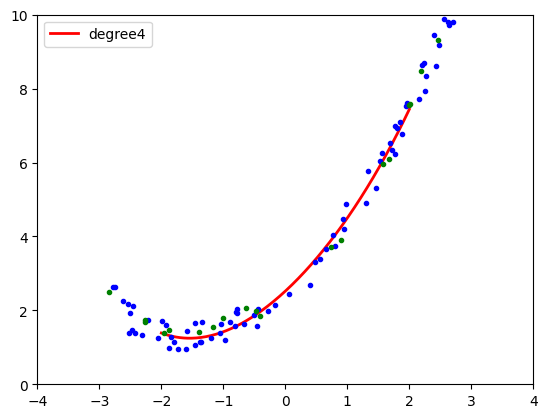

In [73]:
pipe(4)

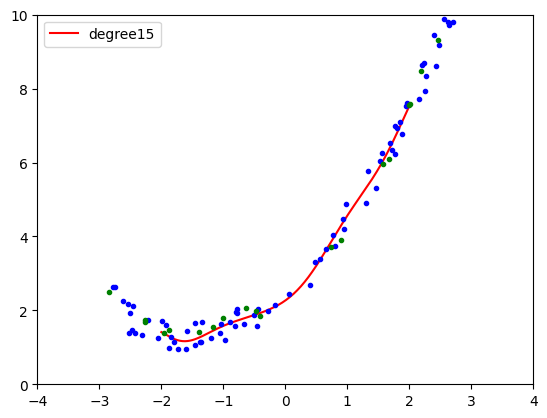

In [ ]:
pipe(15)
#started overfitting

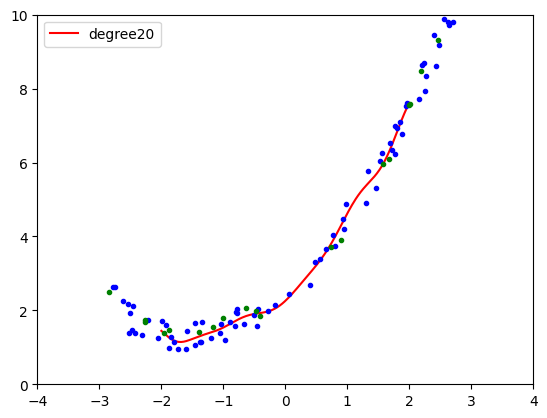

In [64]:
pipe(20)